<a target="_blank" href="https://colab.research.google.com/github/namanagrawal97/bionb2220/blob/main/perceptron.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Watch this video on basics of perceptron

In [ ]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vq15EXj_w-g?si=26gf8vlXf18rOjEb" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')


Can you differentiate between these flowers?


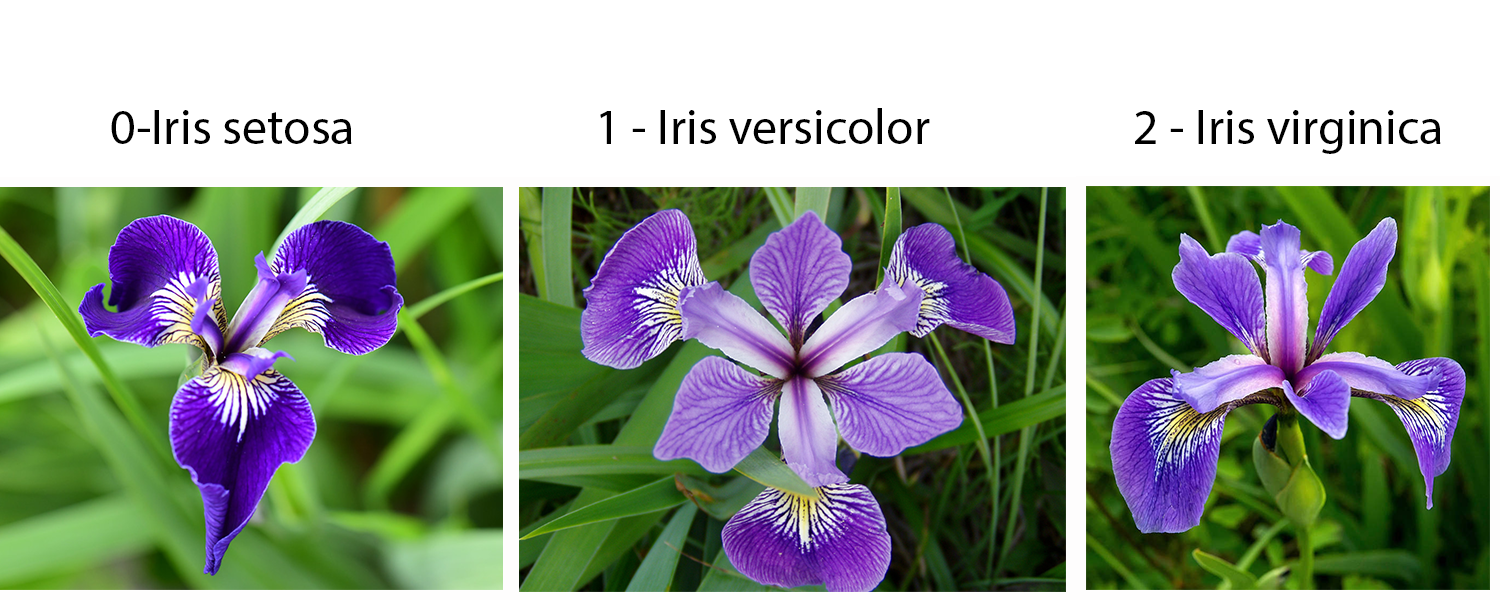

Lets make an AI that can differentiate between these !

# Step 1 : Importing necessary python modules and our data

In [ ]:
import sklearn
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install ipywidgets


## Step 2 : Putting all the data in a nice table

In [ ]:
#Loading the dataset from the world wide web
iris=datasets.load_iris()

#Putting the datatogether nicely in a table
x=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y=pd.DataFrame(iris['target'],columns=['target'])
iris_data=pd.concat([x,y],axis=1)

#Seeing how our tabulated data looks like by just printing the top 3 rows and column names
iris_data.head(3)

## Correlation, Correlation, Correlation !

Each row represents one flower.
There are 4 **features** of every flower - sepal length, sepal width, petal length and petal width.

The column **'target'** is the **true identity of the flower**. It is either 0, i.e. the flower is an *Iris setosa*,
1- the flower is an *Iris versicolor*
2 - the flower is an *Iris virginica*
This column is called 'Target', because we want to build an AI that can predict which species the flower is of based on the features of the flower.

Generally, features become **correlated**. In simpler terms, <u>a flower that has smaller petals might also have smaller sepals</u>. Another species might have larger sepals correlated with larger petals. In other words, we want our AI to identify patterns and separate out the species based on it.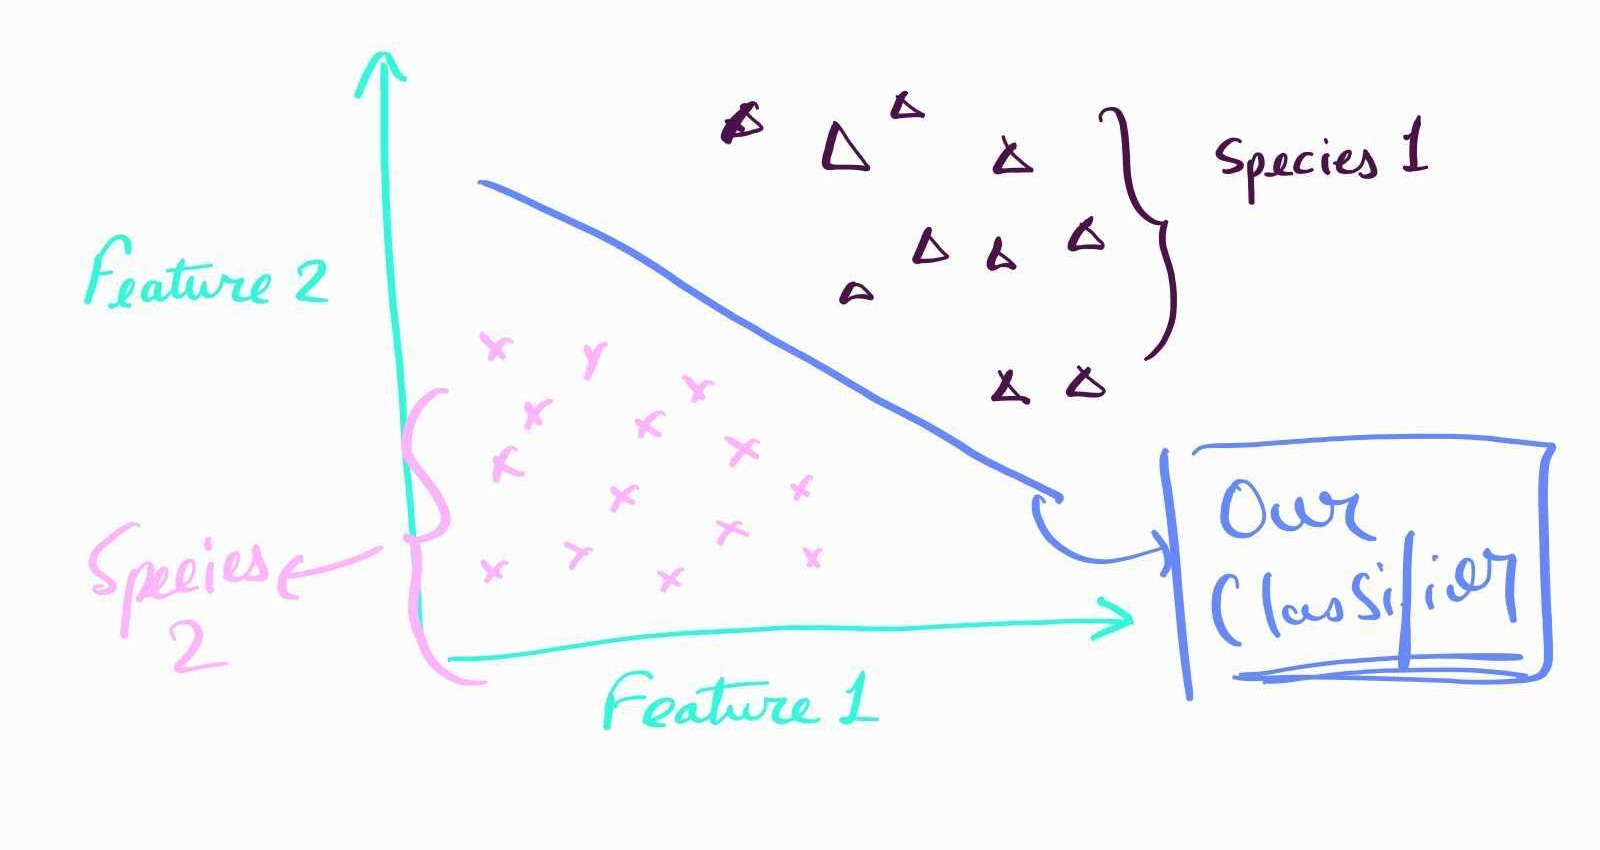


## Step 3 : Lets try to find if any of our features are correlated

In [ ]:
# In order to separate out the species, we will assign each species a color and a number. This will help us in plotting and numerical calculations. Here, we assign " Setosa" as Red, "Versicolor" as Green, and "Virginica" as Blue
color_map = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
color_map2 = {0: 'red', 1: 'green', 2: 'blue'}
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


collist=iris_data.columns

# Our features are Sepal Length, Sepal Width, Petal Length and Petal Width
featurelist=iris_data.columns[0:4]

## Our features are Sepal Length, Sepal Width, Petal Length and Petal Width. We create a list of tuples for each pair of features to plot.
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

#Initializing a superplot within which there will be a lot of subplots of each pair of features.
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

# Loop over each subplot and each pair of features
for ax, pair in zip(axs.flatten(), pairs):
    for species, color in color_map2.items():
        species_data = iris_data[iris_data['target'] == species]
        ax.scatter(species_data[collist[pair[0]]], species_data[collist[pair[1]]], c=color, label=species_map[species])
    ax.set_xlabel(collist[pair[0]])
    ax.set_ylabel(collist[pair[1]])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('{} vs {}'.format(collist[pair[0]], collist[pair[1]]))
    ax.legend()

plt.subplots_adjust(bottom=0.15, hspace=0.6)
plt.show()

#### **[ACTION NEEDED]** Step 4 : Choose any two features using the dropdown menu below to look at their correlation in more detail!

In [ ]:
import ipywidgets as widgets

dropdown1 = widgets.Dropdown(
    options=featurelist,
    description='feature 1:',
)

dropdown2 = widgets.Dropdown(
    options=featurelist,
    description='feature 2:',
)

display(dropdown1)
display(dropdown2)


#### Step 5 : **[IMPORTANT]**!!Make sure to run the next cell so your selection of features goes through

In [ ]:
feat1 = dropdown1.value
feat2 = dropdown2.value

#### Step 6 : Now we will only plot the two features you have chosen. Look carefully at the plot and decide for yourself - which species seem separable ??

In [ ]:


import matplotlib.pyplot as plt

unique_targets = iris_data['target'].unique()
color_map = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
color_map2 = {0: 'red', 1: 'green', 2: 'blue'}
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


for target in unique_targets:
    target_data = iris_data[iris_data['target'] == target]
    plt.scatter(target_data[feat1], target_data[feat2],color=color_map2[target], label=species_map[target])

plt.xlabel(str(feat1))
plt.ylabel(str(feat2))

plt.title(str(feat1) + ' vs ' + str(feat2) + ' for different species')

plt.legend()

plt.show()

#### **[ACTION NEEDED]** Look at the graph and decide - which two species seem separable by a line ?

#### Step 7 : Now select the two species from the dropdown below

In [ ]:
dropdown3 = widgets.Dropdown(
    options=['setosa', 'versicolor', 'virginica'],
    description='species 1:',
)

dropdown4 = widgets.Dropdown(
    options=['setosa', 'versicolor', 'virginica'],
    description='species 2:',
)

display(dropdown3)
display(dropdown4)


#### Step 8 : **[IMPORTANT]**!!Make sure to run the next cell so your selection of species goes through

In [ ]:
species1 = dropdown3.value
species2 = dropdown4.value

#### Step 9 : Now we will only plot the TWO FEATURES of the TWO SPECIES you have chosen. Look carefully at the plot. Can you draw a line and separate the two species?

In [ ]:
setosa = iris_data[iris_data['target'] == 0]
versicolor = iris_data[iris_data['target'] == 1]
virginica = iris_data[iris_data['target'] == 2]

if species1 == 'setosa':
    df1 = setosa
elif species1 == 'versicolor':
    df1=versicolor
elif species1 == 'virginica':
    df1=virginica

if species2 == 'setosa':
    df2 = setosa
elif species2 == 'versicolor':
    df2=versicolor
elif species2 == 'virginica':
    df2=virginica


#plot points where blue o's denote setosa & red x's denote versicolor
plt.scatter(df1[str(feat1)], df1[str(feat2)],c=color_map[species1],label=species1)
plt.scatter(df2[str(feat1)], df2[str(feat2)],c=color_map[species2], label=species2)
plt.xlabel(str(feat1))
plt.ylabel(str(feat2))
plt.legend(loc='upper left')
plt.show()

## Step 10 : Great! Now lets try to get a Perceptron to draw the line for us :)

#### Step 11 : We will put the data of the two species and two features nicely in table for our perceptron to peruse. (machines have manners too !)

In [ ]:
## We take the earlier choices of species and features and put them in a nice table
data = pd.concat([df1, df2])

## This is our choice of two features
X=data[[feat1,feat2]]

## This is the Ground Truth. This is 0 for setosa, 1 for versicolor, and 2 for virginica
y=data['target']

unique_values = pd.unique(y)

#We convert the 0, 1 or 2 to -1 or 1. Remember the Perceptron Lecture ?
y_data = np.where(y == unique_values[0], -1, 1)

test_data=pd.concat([X,pd.Series(y_data)], axis=1)
test_data.head(3)

### Step 12 : Training a Perceptron

#### Step 12.1 - One of the most first and most important things to decide in machine learning is "How much to train our model" ?

#### **[ACTION NEEDED]** Decide on the number of iterations. This is the number of cycles of training our model will train for.

In [ ]:
style = {'description_width': 'initial'}

max_iters=widgets.IntSlider(
    value=0,
    min=0,
    max=10000,
    step=10,
    description='number of iterations:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)
display(max_iters)

#### Step 12.2 : **[IMPORTANT]**!! Make sure to run the next cell so your selection of iterations goes through

In [ ]:
max_iters_final=max_iters.value

#### Step 12.3 : Importing an empty perceptron with random weights

In [ ]:

from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=max_iters_final,eta0=0.1, random_state=1) #initializing a new perceptron

#### Step 12.4 : Training the perceptron on our data

here we are training the model the number of times of the iterations you have decided. We store the errors of the model as it gets more and more trained

In [ ]:

from sklearn.metrics import mean_squared_error


errors = []
classes = np.unique(y_data)

# Train the model for a certain number of epochs
for _ in range(max_iters_final):
    # Fit the model
    ppn.partial_fit(X, y_data,classes=classes)

    # Predict the outputs
    y_pred = ppn.predict(X)

    # Calculate the mean squared error
    error = mean_squared_error(y_data, y_pred)

    # Append the error to the list
    errors.append(error)

#### Step 12.5 : DONE ! Our model is now trained ! Lets see how our model performed

In [ ]:
# Get the coefficients and intercept
coef = ppn.coef_[0]
intercept = ppn.intercept_

# Function to plot decision boundary
def plot_decision_boundary(X, y, coef, intercept,max_iters_final):
    plt.figure(figsize=(10, 6))

    # Plot points
    plt.scatter(df1[str(feat1)], df1[str(feat2)], c=color_map[species1], label=species1)
    plt.scatter(df2[str(feat1)], df2[str(feat2)], c=color_map[species2], label=species2)

    # Plot decision boundary
    x_values = np.array([np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0])])
    y_values = - (intercept + np.dot(coef[0], x_values)) / coef[1]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlim(0, np.max(X[str(feat1)])+1)
    plt.ylim(0, np.max(X[str(feat2)])+1)

    # Set labels and title
    plt.xlabel(str(feat1))
    plt.ylabel(str(feat2))
    plt.title('Decision Boundary (iterations={})'.format(max_iters_final))

    # Show legend
    plt.legend(loc='upper left')

    # Display the plot
    

# Plot the decision boundary
plot_decision_boundary(X, y_data, coef, intercept,max_iters_final)
plt.show()

### So Basically what our model says is, if a flower's combination of feature1 and feature2 falls below and right of the line, it will be species 2, or else it will be species 1

#### **[ACTION NEEDED]** Take a moment to reflect here. Do you think the decision boundary made by the model is good enough ?

Remember, the performance of the model really depends on the features you chose and how much you trained it. After all

#### Step 13 : Statistics for Nerds : We can try to understand how well our model performed by calculating some scores.

In [ ]:
from sklearn.metrics import classification_report

# Use the same data for prediction
y_pred = ppn.predict(X)

# Print the classification report
print(classification_report(y_data, y_pred))

# Print the accuracy
print("Accuracy: ", ppn.score(X, y_data))

![alt text](U0hjG.png)

#### Step 14 : Did the model get better as we trained it ?

We plot the Root Mean Square Error of the model over time.

In [ ]:
import plotly.graph_objects as go

def error_plot(errors):
    trace = go.Scatter(
        y = errors,
        mode = 'lines',
        name = 'Mean Squared Error'
    )

    layout = go.Layout(
        title = 'Error Loss Over Time',
        xaxis = dict(title = 'Iteration'),
        yaxis = dict(title = 'Mean Squared Error'),
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()

error_plot(errors)
# # Create a trace for the errors
# trace = go.Scatter(
#     y = errors,
#     mode = 'lines',
#     name = 'Mean Squared Error'
# )

# # Create the layout
# layout = go.Layout(
#     title = 'Error Loss Over Time',
#     xaxis = dict(title = 'Iteration'),
#     yaxis = dict(title = 'Mean Squared Error'),
# )

# # Create the figure and add the trace
# fig = go.Figure(data=[trace], layout=layout)

# # Show the figure
# fig.show()

#### **[ACTION NEEDED]** Zoom into the graph using controls on Top Right. When does the Error Stabilize ? 

## Step 15 : Final Test

### Time for the final test. Can we give our perceptron a NEW FLOWER that it has never seen before, and ask it to predict which species it is.

In [ ]:
from ipywidgets import Layout

style = {'description_width': 'initial'}


new_features1=widgets.IntText(
    description=featurelist[0],
    disabled=False,style=style
)
display(new_features1)
new_features2=widgets.IntText(
    description=featurelist[1],
    disabled=False,style=style
)
display(new_features2)
new_features3=widgets.IntText(
    description=featurelist[2],
    disabled=False,style=style
)
display(new_features3)
new_features4=widgets.IntText(
    description=featurelist[3],
    disabled=False,style=style
)
display(new_features4)

In [ ]:
sepal_length_new=new_features1.value
sepal_width_new=new_features2.value
petal_length_new=new_features3.value
petal_width_new=new_features4.value

The output of this cell will predict the species

In [ ]:
new_feature_dict = {}
variables = [sepal_length_new, sepal_width_new, petal_length_new, petal_width_new]

for feature, new_feature in zip(featurelist, variables):
    # Use the element of featurelist as key and new_features as value
    new_feature_dict[feature] = new_feature
# Create an array with the new features
new_features = np.array([[new_feature_dict[feat1], new_feature_dict[feat2]]])

new_features_df = pd.DataFrame(new_features, columns=[feat1, feat2])

# Use the trained perceptron to make a prediction
prediction = ppn.predict(new_features_df)

# Create a dictionary for reverse mapping
reverse_mapping = {-1: unique_values[0], 1: unique_values[1]}

# Reverse map the prediction
original_prediction = reverse_mapping[prediction[0]]
species_prediction=species_map[original_prediction]
print("Prediction: ", species_prediction)

Where does the new flower lie ?

In [ ]:
new_feat_list=new_features.tolist()

plot_decision_boundary(X, y_data, coef, intercept,max_iters_final)
plt.scatter(new_feat_list[0][0], new_feat_list[0][1], marker='*', label="New Flower")
plt.show()


In [ ]:
new_feat_list=new_features.tolist()
new_feat_list[0][0]